# Excercise_4 : Naive_Bayes on Amazon Fine Food Review Dataset.

**Objective:** Apply Naive_Bayes on Amazon fine food review dataset and find the f1_score using BOW and Tf-Idf text-to-vector techniques.

**Steps:**
1. Perform DataCleaning(Deduplication).
2. Remove wrong entries.
3. Sort the dataset according to the timestamp.
4. Take the top 200000 samples.
5. Perfrom text-preprocessing(remove html tags,remove punctutation,convert to lower-case,remove stop-words,stemming(snowball))
6. Split the dataset into train,cross_validation,and test sets in ratio 60:20:20.
7. Apply Text-feature_extraction techniques to obtain vectors.
8. Apply Naive-Bayes on the vectors.
9. Obtain different metrics,plot confusion matrix,obtain most frequent words of both classes.

In [0]:
!pip install prettytable

In [0]:
#import the libraries
import warnings 
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB # MultinomialNB- because the vectors contains discrete values - frequency of words.
from google.colab import drive
import pickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from scipy.stats import uniform
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
drive.mount('/content/drive')

In [0]:
#import the text preprocessed datset

with open('/content/drive/My Drive/Colab Notebooks/x_train3.pkl','rb') as f:
  x_train = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/x_test3.pkl','rb') as f:
  x_test = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/y_train3.pkl','rb') as f:
  y_train = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/y_test3.pkl','rb') as f:
  y_test = pickle.load(f)

# BOW 

In [0]:
#Creating a BOW model

bow_model = CountVectorizer() 
bow_x_train = bow_model.fit_transform(x_train)
bow_x_test = bow_model.transform(x_test)


**Obserations:**
1. 41291 unique words.

# Naive_Bayes
**Observations:**
1. MultinomialNB can be used for classification on discrete values , in this case frequency of words.
    It can also be used on fractional values , like tf-idf value vectors.

**Observations:**
1. f1_score is the harmonic mean of precision and recall.
2 .f1_score balances between precision and recall(tpr).
3. Precision is high i.e., ~1 when fp in the denominator is closer to zero.

optimal alpha is 10
f1-score is  0.9382591464533411
Precision score is  0.8903766127487681
recall score is  0.9915844175990383
True neagative rate 0.830931047915855


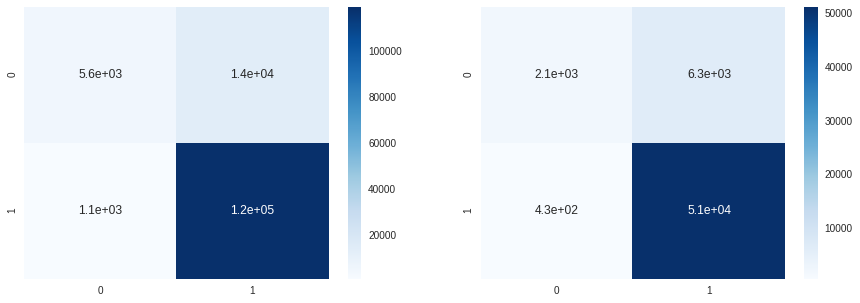

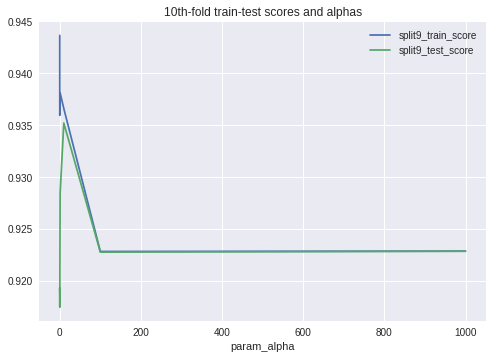

Most frequent words of negative class
 ['like' 'tast' 'good' 'flavor' 'love' 'great' 'use' 'one' 'tea' 'product']
Most frequent words of positive class
 ['tast' 'like' 'product' 'one' 'flavor' 'tri' 'would' 'good' 'use' 'coffe']


In [0]:
#hyperparamter search using Grid search ,2**-9,2**-8,2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2,4,8,16,32,64,128

params = { 'alpha' :[ 0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = MultinomialNB(fit_prior=False)
model = GridSearchCV(clf,params,scoring='f1',cv=10)
model.fit(bow_x_train,y_train)
score = model.score(bow_x_test,y_test)

test_pred = model.best_estimator_.predict(bow_x_test)
train_pred = model.best_estimator_.predict(bow_x_train)

#plot confusion matrix
conf1 = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,test_pred)

#precision and recall
precision = precision_score(y_test,test_pred)  # TP / (TP + FP)
recall = recall_score(y_test,test_pred) #true positive rate TP / (TP + FN)
tnr = conf2[0][0] / (conf2[0][0] + conf2[1][0])
print('optimal alpha is',model.best_estimator_.alpha)
print('f1-score is ',score)
print('Precision score is ',precision)
print('recall score is ',recall)
print('True neagative rate',tnr)

df = pd.DataFrame(model.cv_results_)
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sn.heatmap(conf1,annot=conf1,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
sn.heatmap(conf2,annot=conf2,cbar=True,cmap='Blues')
plt.figure(2)
df.plot(['param_alpha'],['split9_train_score','split9_test_score'],title='10th-fold train-test scores and alphas')
plt.show()

#Print most frequent words of each class.
neg = model.best_estimator_.feature_log_prob_[1,:].argsort()
negative_prob = neg[::-1]
pos = model.best_estimator_.feature_log_prob_[0,:].argsort()
positive_prob = pos[::-1]

print('Most frequent words of negative class\n',np.take(bow_model.get_feature_names(),negative_prob[:10]))
print('Most frequent words of positive class\n',np.take(bow_model.get_feature_names(),positive_prob[:10]))

**Observations:**
1. The test dataset is imbalanced(positive - 35000 , negative-5000).
2. f1_score is 0.938.
3. True poisitive rate - 99% , True neagtive rate -  83%. on test data.

# TF-IDF

In [0]:
#Tfidf Vectorization

tfidf_model = TfidfVectorizer(ngram_range=(1,2))
tfidf_x_train = tfidf_model.fit_transform(x_train)

#transform on cv,test data
tfidf_x_test = tfidf_model.transform(x_test)


In [0]:
tfidf_x_train.shape

(140000, 1559361)

**Observations:**
1. 1559361 unique 1-grams and 2-grams

# Naive_Bayes

The optimal alpha is 0.1
f1-score is  0.8992468709403031
Precision score is  0.9155278610806831
recall score is  0.9885982431986969
True negatie rate 0.8636679805239972


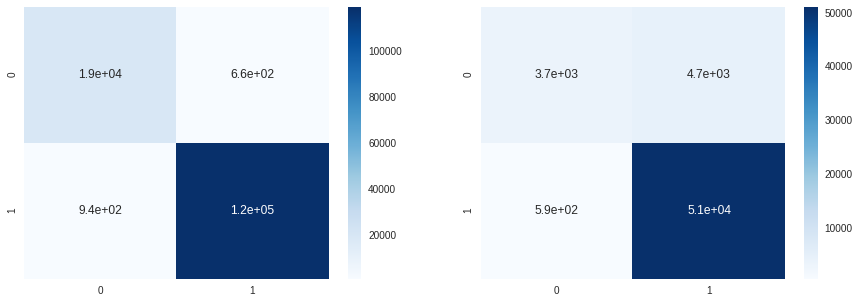

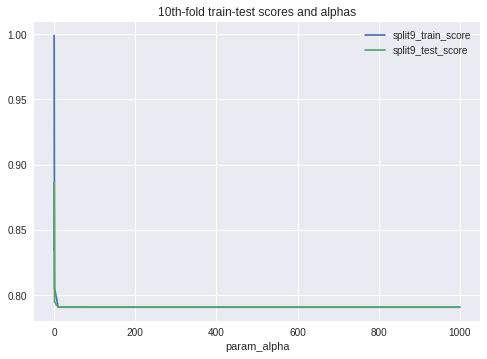

Most frequent words of negative class
 ['great' 'love' 'tea' 'tast' 'like' 'good' 'flavor' 'coffe' 'use'
 'product']
Most frequent words of positive class
 ['tast' 'like' 'product' 'would' 'one' 'flavor' 'coffe' 'tri' 'buy'
 'order']


In [0]:
#hyperparamter search using Grid search

params = { 'alpha' : [ 0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = MultinomialNB(fit_prior=False)
model2 = GridSearchCV(clf,params,scoring='f1_weighted',cv=10)
model2.fit(tfidf_x_train,y_train)
score = model2.score(tfidf_x_test,y_test)
print('The optimal alpha is',model2.best_estimator_.alpha)

train_pred = model2.best_estimator_.predict(tfidf_x_train)
test_pred = model2.best_estimator_.predict(tfidf_x_test)

df2 = pd.DataFrame(model2.cv_results_)

conf1 = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,test_pred)

precision = precision_score(y_test,test_pred)  # TP / (TP + FP)
recall = recall_score(y_test,test_pred) #true positive rate TP / (TP + FN)
tnr = conf2[0][0] / (conf2[0][0] + conf2[1][0])

print('f1-score is ',score)
print('Precision score is ',precision)
print('recall score is ',recall)
print('True negatie rate',tnr)

#plot confusion matrix
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sn.heatmap(conf1,annot=conf1,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
sn.heatmap(conf2,annot=conf2,cbar=True,cmap='Blues')
plt.figure(2)
df2.plot(['param_alpha'],['split9_train_score','split9_test_score'],title='10th-fold train-test scores and alphas')
plt.show()

#Print most frequent words of each class.
neg = model2.best_estimator_.feature_log_prob_[1,:].argsort()
negative_prob = neg[::-1]
pos = model2.best_estimator_.feature_log_prob_[0,:].argsort()
positive_prob = pos[::-1]

print('Most frequent words of negative class\n',np.take(tfidf_model.get_feature_names(),negative_prob[:10]))
print('Most frequent words of positive class\n',np.take(tfidf_model.get_feature_names(),positive_prob[:10]))

**Observations:**
1. The optimal alpha is found from gridsearch and 10-fold cv, and f1_weighted metric.
2.True positive rate -  98%,True negative rate - 86%.


# Conclusion :
1.

In [0]:
x = PrettyTable()
x.field_names = ['Feature_extraction','Hyperparameter','f1_score','precision','recall']
x.add_row(['BOW',10,0.9382, 0.8903, 0.9915])
x.add_row(['Tf-Idf',0.1,0.8992,0.9155, 0.9885])
print(x)

+--------------------+----------------+----------+-----------+--------+
| Feature_extraction | Hyperparameter | f1_score | precision | recall |
+--------------------+----------------+----------+-----------+--------+
|        BOW         |       10       |  0.9382  |   0.8903  | 0.9915 |
|       Tf-Idf       |      0.1       |  0.8992  |   0.9155  | 0.9885 |
+--------------------+----------------+----------+-----------+--------+
